# Notebook to analyze brightness from training videos

In [1]:
from scripts.conf_file_finding import try_find_conf_file
try_find_conf_file()

import datajoint as dj
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib.patches as mpatches
from os.path import exists
import cv2

from matplotlib import cm
from u19_pipeline import utility as uti


Local configuration file found !!, no need to run the configuration (unless configuration has changed)


In [3]:
dj.conn()
drive_videos = '/u19_dj'
root_path = uti.get_network_path(drive_videos)

## Databases to connect

In [4]:
behavior = dj.create_virtual_module('behavior', 'u19_behavior')

## Get all sessions with video

In [28]:
trials_video = pd.DataFrame((behavior.TowersBlockTrialVideo).fetch('KEY', as_dict=True))
trials_video.head()

blocks_video = trials_video.drop_duplicates(subset=['subject_fullname', 'session_date', 'session_number', 'block'])
blocks_video = blocks_video.drop(['trial_idx'], axis=1)
blocks_video = blocks_video.reset_index(drop=True)
blocks_video

,subject_fullname,session_date,session_number,block
0,efonseca_jj014,2020-12-14,0,1
1,efonseca_jj014,2020-12-14,0,2
2,efonseca_jj014,2020-12-14,0,3
3,efonseca_jj014,2020-12-14,0,4
4,efonseca_jj016,2021-02-28,0,2
...,...,...,...,...
85,sbolkan_d1_1293,2020-12-30,0,2
86,sbolkan_d2_402,2020-12-29,0,1
87,testuser_T01,2021-07-09,0,1
88,testuser_T01,2021-07-12,0,1


## Get videos for each session

In [32]:
cols_trials = ['subject_fullname', 'session_date', 'session_number', 'block', 'trial_idx', 'cue_presence_left', 'cue_presence_right', 'cue_onset_left', 'cue_onset_right', 'video_path']
order_by=('block', 'trial_idx')

for i in range(1):

    key_dict = blocks_video.loc[i+10, :].to_dict()
    video_df = pd.DataFrame((behavior.TowersBlockTrialVideo * behavior.TowersBlock.Trial & key_dict).fetch(*cols_trials, as_dict=True, order_by=order_by))


    for j in range(2):
        path_video = video_df.loc[j, 'video_path']
        path_video = path_video.replace(drive_videos, root_path)
        print(path_video)

        # Create a VideoCapture object and read from input file
        # If the input is the camera, pass 0 instead of the video file name
        cap = cv2.VideoCapture(path_video)

        # Check if camera opened successfully
        if (cap.isOpened()== False): 
            print("Error opening video stream or file")

        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        mean_value = np.zeros((total_frames))
        for k in range(total_frames):
        
            # Capture frame-by-frame
            ret, frame = cap.read()
            if ret == True:
                mean_value[k] = np.mean(frame.flatten())


    cap.release()



/mnt/cup/u19_dj/external_files/u19_behavior/TowersBlockTrialVideo/emanuele/emanuele_B14972/20160310_S0/B2/emanuele_B14972_20160310_S0-B2-T1.mp4
/mnt/cup/u19_dj/external_files/u19_behavior/TowersBlockTrialVideo/emanuele/emanuele_B14972/20160310_S0/B2/emanuele_B14972_20160310_S0-B2-T2.mp4


### Create label and color patches for plot

In [33]:
video_df


,subject_fullname,session_date,session_number,block,trial_idx,video_path,cue_presence_left,cue_presence_right,cue_onset_left,cue_onset_right
0,emanuele_B14972,2016-03-10,0,2,1,/u19_dj/external_files/u19_behavior/TowersBloc...,"[[False, False, False, False, False, False]]","[[True, True, True, True, True, True]]",None,"[[70, 179, 301, 370, 449, 481]]"
1,emanuele_B14972,2016-03-10,0,2,2,/u19_dj/external_files/u19_behavior/TowersBloc...,"[[True, True, True]]","[[False, False, False]]","[[70, 282, 372]]",None
2,emanuele_B14972,2016-03-10,0,2,3,/u19_dj/external_files/u19_behavior/TowersBloc...,"[[False, False, False, False, False, False, Fa...","[[True, True, True, True, True, True, True, Tr...",None,"[[90, 126, 203, 244, 265, 293, 314, 340, 370, ..."
3,emanuele_B14972,2016-03-10,0,2,4,/u19_dj/external_files/u19_behavior/TowersBloc...,"[[False, False, False, False, False, False]]","[[True, True, True, True, True, True]]",None,"[[141, 181, 204, 296, 352, 380]]"
4,emanuele_B14972,2016-03-10,0,2,5,/u19_dj/external_files/u19_behavior/TowersBloc...,"[[False, False, False, False, False, False, Fa...","[[True, True, True, True, True, True, True, Tr...",None,"[[73, 96, 129, 215, 272, 310, 341, 378]]"
5,emanuele_B14972,2016-03-10,0,2,6,/u19_dj/external_files/u19_behavior/TowersBloc...,"[[False, False, False, False, False, False, Fa...","[[True, True, True, True, True, True, True, Tr...",None,"[[78, 141, 197, 221, 248, 287, 323, 349, 371, ..."
6,emanuele_B14972,2016-03-10,0,2,7,/u19_dj/external_files/u19_behavior/TowersBloc...,"[[False, False, False, False, False, False, Fa...","[[True, True, True, True, True, True, True, Tr...",None,"[[97, 142, 149, 178, 211, 244, 267, 295, 322, ..."
7,emanuele_B14972,2016-03-10,0,2,8,/u19_dj/external_files/u19_behavior/TowersBloc...,"[[False, False, False, False, False, False, Fa...","[[True, True, True, True, True, True, True, Tr...",None,"[[110, 151, 207, 282, 315, 340, 356, 386, 418]]"
8,emanuele_B14972,2016-03-10,0,2,9,/u19_dj/external_files/u19_behavior/TowersBloc...,"[[True, True, True, True, True, True]]","[[False, False, False, False, False, False]]","[[74, 153, 202, 225, 341, 425]]",None
9,emanuele_B14972,2016-03-10,0,2,10,/u19_dj/external_files/u19_behavior/TowersBloc...,"[[True, True, True, True, True, True]]","[[False, False, False, False, False, False]]","[[82, 150, 234, 261, 374, 458]]",None


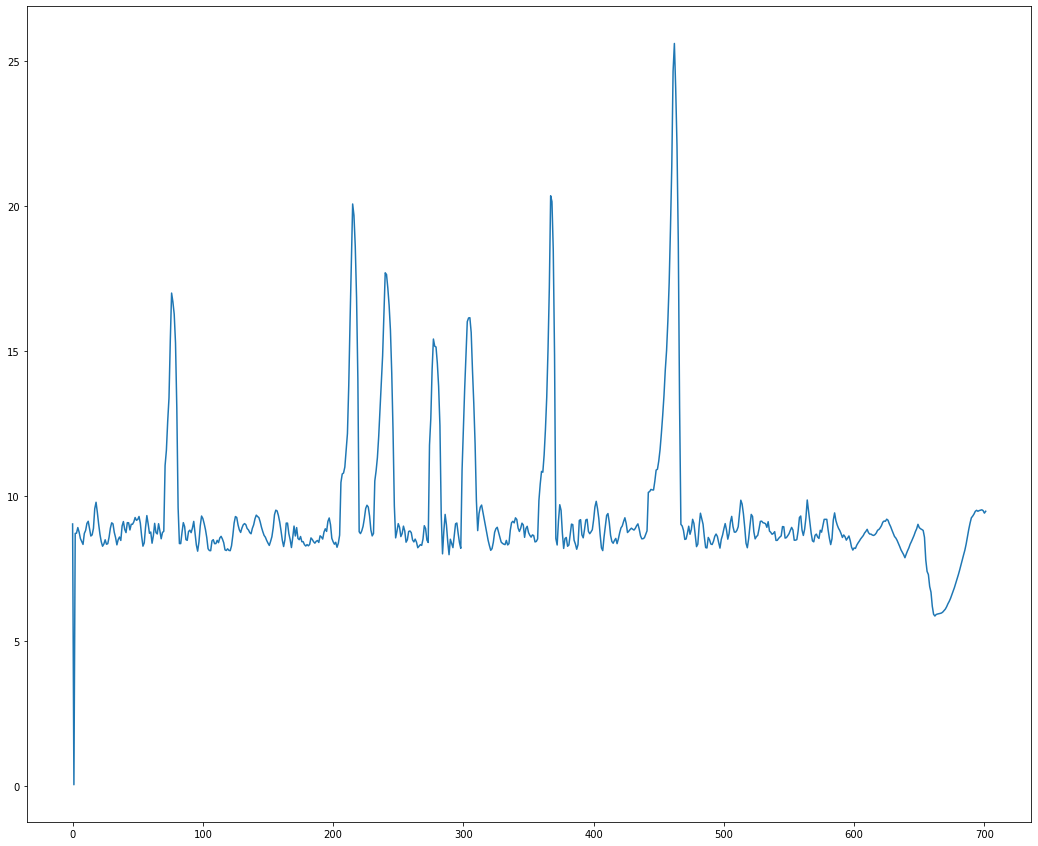

In [34]:
 
fig, axs = plt.subplots(1, 1, figsize=(15,12), sharex=True, sharey=True, squeeze=False)

plt.plot(mean_value)

## "PreFilter sessions, blocks, join data tables if needed

In [43]:
cap = cv2.VideoCapture(path_video)

### Get  set to separate plots by 

In [9]:
plots_records = ['']
if len(split_plots_by) > 0:
    plots_records = table_filter.fetch(split_plots_by)
    plots_records = list(set(plots_records))
    plots_records.sort()
num_figs = len(plots_records)

### Fit all sessions to sigmoid and plot

In [ ]:
df_summary = pd.DataFrame(columns = [split_plots_by, 'Type', '%Correct', 'Total trials', 'Sigmoid fit'])

rows, cols = utility.get_cols_rows_plot(num_figs, fig_size)            
fig, axs = plt.subplots(rows, cols, figsize=fig_size, sharex=True, sharey=True, squeeze=False)
renderer = fig.canvas.get_renderer()

#Decide font size for plots
if rows*cols >= 9:
    ac_fs = small_font_size
elif rows*cols >= 5:
    ac_fs = medium_font_size
else:
    ac_fs = big_font_size

for split_idx, split in enumerate(plots_records):

    print(split_idx+1, '/', len(plots_records))
    
    ac_col = split_idx%cols
    ac_row = int(split_idx/cols)
        
    #Create dictionary for split key plot (if applicable)
    split_key = dict()
    split_key[split_plots_by] = split

    for key_idx, key in enumerate(condition_key):

        #Fetch session info (if split, add split_key to query)
        if len(split_plots_by) > 0:
            thisCondition = data_table & table_filter.proj() & key & split_key
        else:
            thisCondition = data_table & table_filter.proj() & key
            
        # Fetch all fields of table except external (for speed)
        if key_idx == 0:
            fields_query = pd.DataFrame.from_dict(thisCondition.heading.attributes, orient='index')
            fields_query = fields_query.loc[fields_query['is_external'] == False, :]
            fields_query = fields_query.index.to_list()

        # Fetch session  
        session_info = pd.DataFrame(thisCondition.fetch(*fields_query, as_dict=True))

        # Choice and trial type as integer
        if session_info.shape[0] > 0:

            session_info = utility.translate_choice_trials_cues(session_info)

            # Call Fit to sigmoid function
            fit_dict = utility.psychFit(deltaBins, session_info['cue_presence_right'].values, \
                                session_info['cue_presence_left'].values, session_info['choice_int'].values)

            dict_summary = dict()
            dict_summary[split_plots_by]        =  split
            dict_summary['Type']         =  key
            dict_summary['%Correct']     =  np.sum(session_info['choice'].values == session_info['trial_type'].values)/session_info.shape[0]
            dict_summary['Total trials'] =  session_info.shape[0]
            dict_summary['Sigmoid fit']  =  fit_dict
            
            df_summary = df_summary.append(dict_summary, ignore_index = True)

            #Select color from color dictionary
            color_plot = color_dict_keys[key]
            #Plot results
            axs[ac_row, ac_col].plot(fit_dict['delta_bins'], fit_dict['pright_data'], 'o', color = color_plot)
            if fit_dict['delta_fit'].shape[0] > 0:
                axs[ac_row, ac_col].plot(fit_dict['delta_fit'], fit_dict['pright_fit'], '--', color = color_plot)
    
    # Axes, legends and labels
    if ac_col == 0:
        axs[ac_row, ac_col].set_ylabel("% Turned left", fontsize=ac_fs[1])
    
    axs[ac_row, ac_col].set_ylim([-1, 101])
    mean_correct_string = f"{df_summary.loc[df_summary[split_plots_by] == split, '%Correct'].mean()*100:2.1f}"
    if len(split_plots_by) > 7:
        title_label = str(split) + '-%Correct: ' + mean_correct_string
    else:
        title_label = split_plots_by + " : " + str(split) + '%Correct: ' + mean_correct_string
    axs[ac_row, ac_col].set_title(title_label, fontsize=ac_fs[0])
    
    fig.canvas.draw()
    plt.draw()    
    axs[ac_row, ac_col].draw(renderer)

    xlabels = axs[ac_row, ac_col].get_xticklabels()
    xlabels_t = [x.get_text() for x in xlabels]
    if len(xlabels) > 0:
        axs[ac_row, ac_col].set_xticklabels(xlabels, fontsize=ac_fs[1])
    ylabels = axs[ac_row, ac_col].get_yticklabels()
    ylabels_t = [x.get_text() for x in ylabels]
    if len(ylabels) > 0:
        axs[ac_row, ac_col].set_yticklabels(ylabels, fontsize=ac_fs[1])

for i in range(0,cols):
    axs[rows-1, i].set_xlabel("total evidence (L-R)", fontsize=ac_fs[1])
    
axs[rows-1, cols-1].legend(handles=patches_legend, fontsize=ac_fs[0])


1 / 7


## Summary DataFrame

In [18]:
mean_correct = df_summary['%Correct'].mean()
total_trials = df_summary['Total trials'].sum()

total_df = pd.DataFrame([['', 'Totals', mean_correct, total_trials, None]], columns=df_summary.columns)

df_final = df_summary.append(total_df, ignore_index=True)

if len(split_plots_by) > 0:
    df_final = df_final.set_index([split_plots_by, 'Type'])
else:
    df_final = df_final.set_index(['Type'])
df_final

%Correct Total trials  \
subject_fullname Type                                 
jjulian_jj026    stim_on = 0  0.528014          589   
                 stim_on = 1  0.469697          132   
jjulian_jj027    stim_on = 0  0.587295         2251   
                 stim_on = 1  0.507168          558   
jjulian_jj028    stim_on = 0  0.483871          372   
                 stim_on = 1  0.514563          103   
                 Totals       0.515101         4005   

                                                                    Sigmoid fit  
subject_fullname Type                                                            
jjulian_jj026    stim_on = 0  {'delta_bins': [0], 'delta_data': [0.005093378...  
                 stim_on = 1  {'delta_bins': [0], 'delta_data': [-0.06060606...  
jjulian_jj027    stim_on = 0  {'delta_bins': [0], 'delta_data': [0.062638827...  
                 stim_on = 1  {'delta_bins': [0], 'delta_data': [0.050179211...  
jjulian_jj028    stim_on = 0  {'delta_bins': [0], 'delta_data': [0.150537634...  
                 stim_on = 1  {'delta_bins': [0], 'delta_data': [0.165048543...  
                 Totals                                                    None